In [1]:
import seaborn as sns
import numpy as np

In [2]:
import pandas as pd

In [6]:
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Series.
 |  
 |      .. versionchanged:: 

In [7]:
x=np.random.randn(100)

In [8]:
x=pd.Series(x)

In [9]:
x

0    -0.402075
1     0.344214
2     0.647397
3     0.707542
4     1.102227
        ...   
95    0.858873
96    0.331232
97    3.729280
98    1.437812
99   -1.257015
Length: 100, dtype: float64

In [3]:
import pandas as pd
df=pd.read_csv('shampoo.csv', header=0, parse_dates=[0])
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [7]:
df.shape

(36, 2)

<AxesSubplot:>

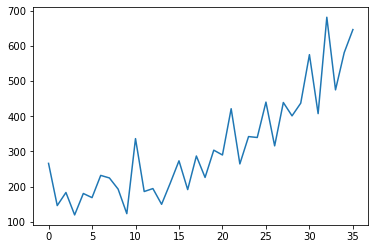

In [3]:
df['Sales'].plot()

<AxesSubplot:ylabel='Sales'>

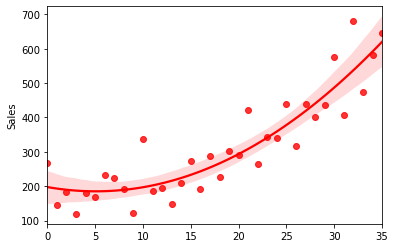

In [4]:
sns.regplot(x=df.index.values,y=df['Sales'],color='red',order=2)

On remarque qu'on a une tendance polynomiale (**d=2**)

On a pas de saisonalité non plus

On doit différencier 2 fois dans notre model ARIMA pour supprimer la tendance

### Autocorrelation ACF plot

In [5]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

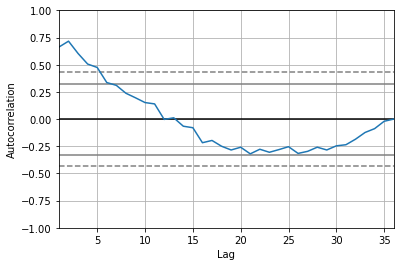

In [6]:
autocorrelation_plot(df['Sales'])

ARIMA(p,d,q) 

**d=2**

**q=5**: car c'est à par de h=5 que les autocorrélations sont significativement nulles

### Partial Autocorrelation PACF plot

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf

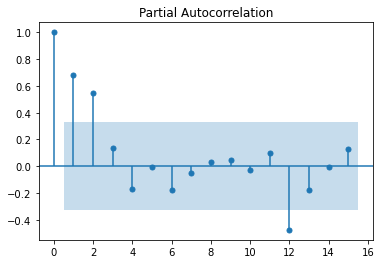

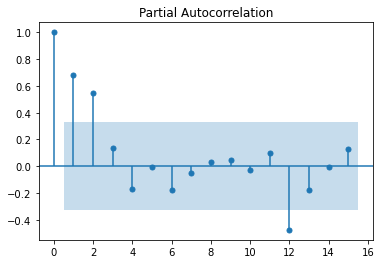

In [9]:
plot_pacf(df['Sales'],lags=15)

On doit garder **p=2**

In [10]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima.model:

class ARIMA(statsmodels.tsa.statespace.sarimax.SARIMAX)
 |  ARIMA(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average (ARIMA) model, and extensions
 |  
 |  This model is the basic interface for ARIMA-type models, including those
 |  with exogenous regressors and those with seasonal components. The most
 |  general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
 |  all specialized cases, including
 |  
 |  - autoregressive models: AR(p)
 |  - moving average models: MA(q)
 |  - mixed autoregressive moving average models: ARMA(p, q)
 |  - integration models: ARIMA(p, d, q)
 |  - seasonal models: SARIMA(P, D, Q, s)
 |  - regression with errors that follow one of the above ARIMA-type models
 |  
 |  Parame

In [12]:
model=ARIMA(df['Sales'],order=(2,2,5))

In [13]:
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [14]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 2, 5)   Log Likelihood                -189.635
Date:                Sat, 02 Oct 2021   AIC                            395.269
Time:                        11:53:49   BIC                            407.480
Sample:                             0   HQIC                           399.434
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9079      0.246     -7.742      0.000      -2.391      -1.425
ar.L2         -0.9545      0.219     -4.363      0.000      -1.383      -0.526
ma.L1         -0.0681     19.858     -0.003      0.997     -38.989      38.853
ma.L2         -1.8461      2.774     -0.665      0.506      -7.284       3.592
ma.L3          0.3024     19.804      0.015      0.988     -38.513      39.118
ma.L4          0.9883      2.806      0.352      0.725      -4.512       6.489
ma.L5         -0.1280      0.339     -0.377      0.706      -0.793       0.537
sigma2      2696.5697      0.014   1.95e+05      0.000    2696.543    2696.597
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.39   Prob(JB):                         0.92
Heteroskedasticity (H):               0.94   Skew:                            -0.01
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.97e+23. Standard errors may be unstable.
"""

In [15]:
residuals=model_fit.resid

<AxesSubplot:>

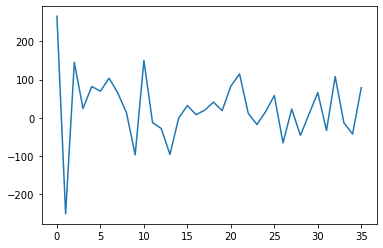

In [16]:
residuals.plot()

In [17]:
residuals.describe()

count     36.000000
mean      25.166132
std       86.508246
min     -251.672098
25%      -14.150400
50%       19.384769
75%       72.117998
max      266.000000
dtype: float64

### forcast the future value
* valeur prédite
* std
* intervalle de confiance de cette valeur

In [18]:
out_put=model_fit.forecast()

In [19]:
out_put

36    656.795678
dtype: float64

In [20]:
model_fit.forecast(5) # prédir les 5 prochaines valeurs

36    656.795678
37    637.266993
38    712.228566
39    710.393136
40    755.778265
Name: predicted_mean, dtype: float64

### walk forward validation for ARIMA

In [21]:
df=pd.read_csv('shampoo.csv', header=0, parse_dates=[0])

In [22]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [23]:
train_size=int(df.shape[0]*0.7)

In [24]:
train, test= df.Sales[0:train_size], df.Sales[train_size:]

In [25]:
train.shape

(25,)

In [26]:
test.shape

(11,)

In [27]:
data=train
predict=[]
for t in test:
    model=ARIMA(data,order=(2,2,0))
    model_fit=model.fit()
    y=model_fit.forecast()
    print(y.values[0])
    predict.append(y.values[0])
    data=np.append(data,t)
    data=pd.Series(data)

335.89065486195824
457.60589361172845
399.79381596445654
363.71585975563033
458.69998864333775
446.21254831379457
571.9965746032171
560.5677564829062
546.9689524952842
670.6452323117962
542.1993759171626


In [28]:
predict

[335.89065486195824,
 457.60589361172845,
 399.79381596445654,
 363.71585975563033,
 458.69998864333775,
 446.21254831379457,
 571.9965746032171,
 560.5677564829062,
 546.9689524952842,
 670.6452323117962,
 542.1993759171626]

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mse=mean_squared_error(test,predict)
mse

10636.205258089125

### SARIMA Model
take into account the seasonality

In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
df=pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv',header=0,parse_dates=[0])

In [6]:
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [7]:
df.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


In [8]:
df.index=df['Month']

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

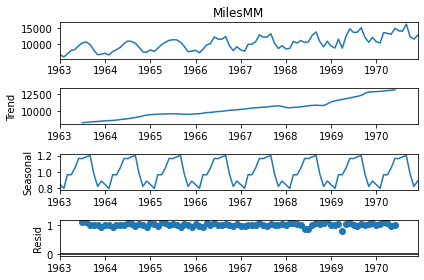

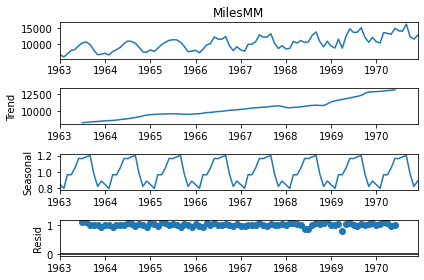

In [10]:
df_decom=seasonal_decompose(df['MilesMM'],model='multiplicative')
df_decom.plot()

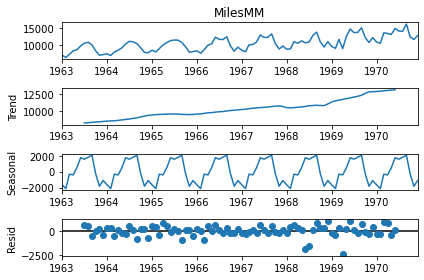

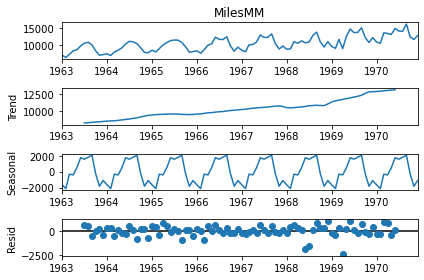

In [11]:
df_decom_a=seasonal_decompose(df['MilesMM'],model='additive')
df_decom_a.plot()

In [12]:
model=SARIMAX(df['MilesMM'],order=(5,1,3),seasonal_order=(1,1,1,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [13]:
help(SARIMAX)

Help on class SARIMAX in module statsmodels.tsa.statespace.sarimax:

class SARIMAX(statsmodels.tsa.statespace.mlemodel.MLEModel)
 |  SARIMAX(endog, exog=None, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, measurement_error=False, time_varying_regression=False, mle_regression=True, simple_differencing=False, enforce_stationarity=True, enforce_invertibility=True, hamilton_representation=False, concentrate_scale=False, trend_offset=1, use_exact_diffuse=False, dates=None, freq=None, missing='none', **kwargs)
 |  
 |  Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
 |  model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The observed time-series process :math:`y`
 |  exog : array_like, optional
 |      Array of exogenous regressors, shaped nobs x k.
 |  order : iterable or iterable of iterables, optional
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters. `d` must be an int

In [14]:
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
residuals=model_fit.resid

<AxesSubplot:xlabel='Month'>

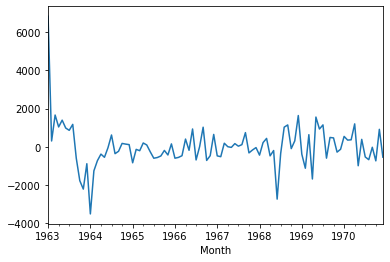

In [17]:
residuals.plot()

In [18]:
output=model_fit.forecast()

In [19]:
output

1971-01-01    11476.000788
Freq: MS, dtype: float64

In [21]:
model_fit.forecast(12)

1971-01-01    11476.000788
1971-02-01    11153.739113
1971-03-01    13670.158786
1971-04-01    12648.006632
1971-05-01    14338.913895
1971-06-01    15786.366118
1971-07-01    14979.451132
1971-08-01    15362.649708
1971-09-01    16963.089291
1971-10-01    13681.987053
1971-11-01    12426.872790
1971-12-01    13730.460296
Freq: MS, Name: predicted_mean, dtype: float64

In [22]:
pred=model_fit.predict()# on doit donnée date début et date fin

In [25]:
from matplotlib import pyplot

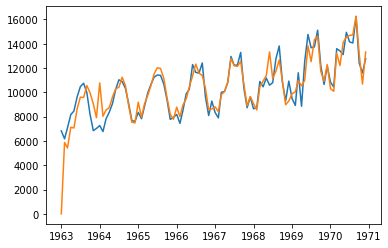

In [27]:
pyplot.plot(df['MilesMM'])
pyplot.plot(pred)